In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
city_types = combined_data["type"].value_counts()
city_types

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

## Bubble Plot of Ride Sharing Data

In [3]:
# Show plot
plt.show()

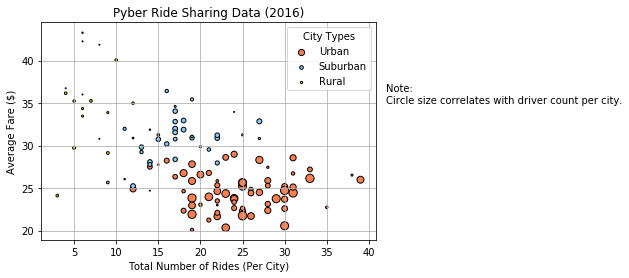

In [4]:
# Obtain the x and y coordinates for each of the three city types
urban_type = combined_data[combined_data["type"] == "Urban"].groupby([combined_data["city"]])
suburban_type = combined_data[combined_data["type"] == "Suburban"].groupby([combined_data["city"]])
rural_type = combined_data[combined_data["type"] == "Rural"].groupby([combined_data["city"]])

x_urban = urban_type["ride_id"].count()
x_suburban = suburban_type["ride_id"].count()
x_rural = rural_type["ride_id"].count()

y_urban = urban_type["fare"].mean()
y_suburban = suburban_type["fare"].mean()
y_rural = rural_type["fare"].mean()

size_urban = urban_type["driver_count"].mean()
size_suburban = suburban_type["driver_count"].mean()
size_rural = rural_type["driver_count"].mean()


# Build the scatter plots for each city types

plt.scatter(x_urban, y_urban, label = "Urban", color=["coral"], edgecolor="black", marker="o", s=size_urban)
plt.scatter(x_suburban, y_suburban, label = "Suburban", color=["lightskyblue"], edgecolor="black", marker="o", s=size_suburban)
plt.scatter(x_rural, y_rural, label = "Rural", color=["gold"],edgecolor="black", marker="o", s=size_rural,  )
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(title= "City Types", loc="best") 

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.")


# Save Figure
plt.savefig("Images/BubblePlotRideSharingData.png")

## Total Fares by City Type

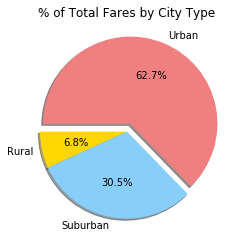

In [6]:
# Calculate Type Percents
city_type_group = combined_data.groupby(['type'])
total_fares = city_type_group['fare'].sum()

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
labels = ["Rural","Suburban","Urban"]
plt.pie(total_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/TotalFaresbyCityType.png")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

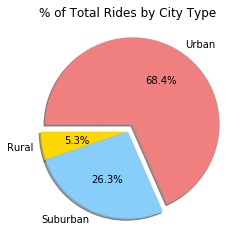

In [8]:
# Calculate Ride Percents
rides_count = city_type_group['ride_id'].count()

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
labels = ["Rural","Suburban","Urban"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/TotalRidesbyCityType.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

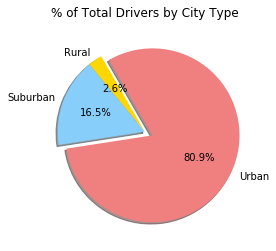

In [10]:
# Calculate Driver Percents
total_drivers = city_data.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
labels = ["Rural","Suburban","Urban"]
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Drivers by City Type")

# Save Figure

plt.savefig("Images/TotalDriversbyCityType.png")

In [ ]:
# Show Figure
plt.show()